In [18]:
import warnings
from pandas.errors import PerformanceWarning  # Use this if PerformanceWarning needs to be suppressed
from statsmodels.tools.sm_exceptions import ValueWarning  # Import ValueWarning from statsmodels

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)   # General warnings
warnings.filterwarnings("ignore", category=FutureWarning) # FutureWarning from statsmodels
warnings.filterwarnings("ignore", category=ValueWarning)  # ValueWarning for unsupported index
warnings.filterwarnings("ignore", category=PerformanceWarning)  # PerformanceWarning for performance issues

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/FA4_n3_Time_Series.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/FA4_n3_Time_Series.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 828098 bytes to /content/drive/My Drive/Colab Notebooks/FA4_n3_Time_Series.html


# FA 4

Samson, Justine Aizel D.

# U.S. Beverage Manufacturer Product Shipments Dataset

In [12]:
# prompt: get data or get acess to my drive /content/drive

from google.colab import drive
drive.mount('/content/drive')

# Now you can access your Google Drive files using the path '/content/drive/My Drive/'
# For example, to list the files in your Google Drive:
#!ls '/content/drive/My Drive/'

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


# Load the dataset
data_path = "/content/drive/My Drive/CSV files/U.S. Beverage Manufacturer Product Shipments.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,DATE,DollarsInMillions
0,01/01/1992,3519
1,01/02/1992,3803
2,01/03/1992,4332
3,01/04/1992,4251
4,01/05/1992,4661


**1. Make a time series plot of the data.**

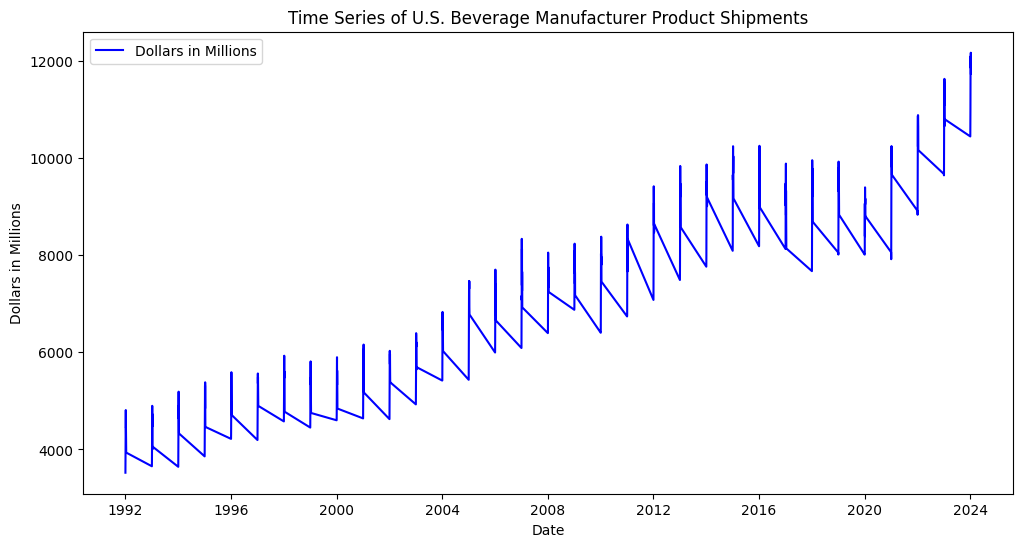

In [13]:
# Convert DATE to datetime format
data['DATE'] = pd.to_datetime(data['DATE'], format='%m/%d/%Y')

# Set the DATE column as index
data.set_index('DATE', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['DollarsInMillions'], label='Dollars in Millions', color='blue')
plt.title('Time Series of U.S. Beverage Manufacturer Product Shipments')
plt.xlabel('Date')
plt.ylabel('Dollars in Millions')
plt.legend()
plt.show()

**2. Calculate and plot the sample autocorrelation and partial autocorrelation functions.**

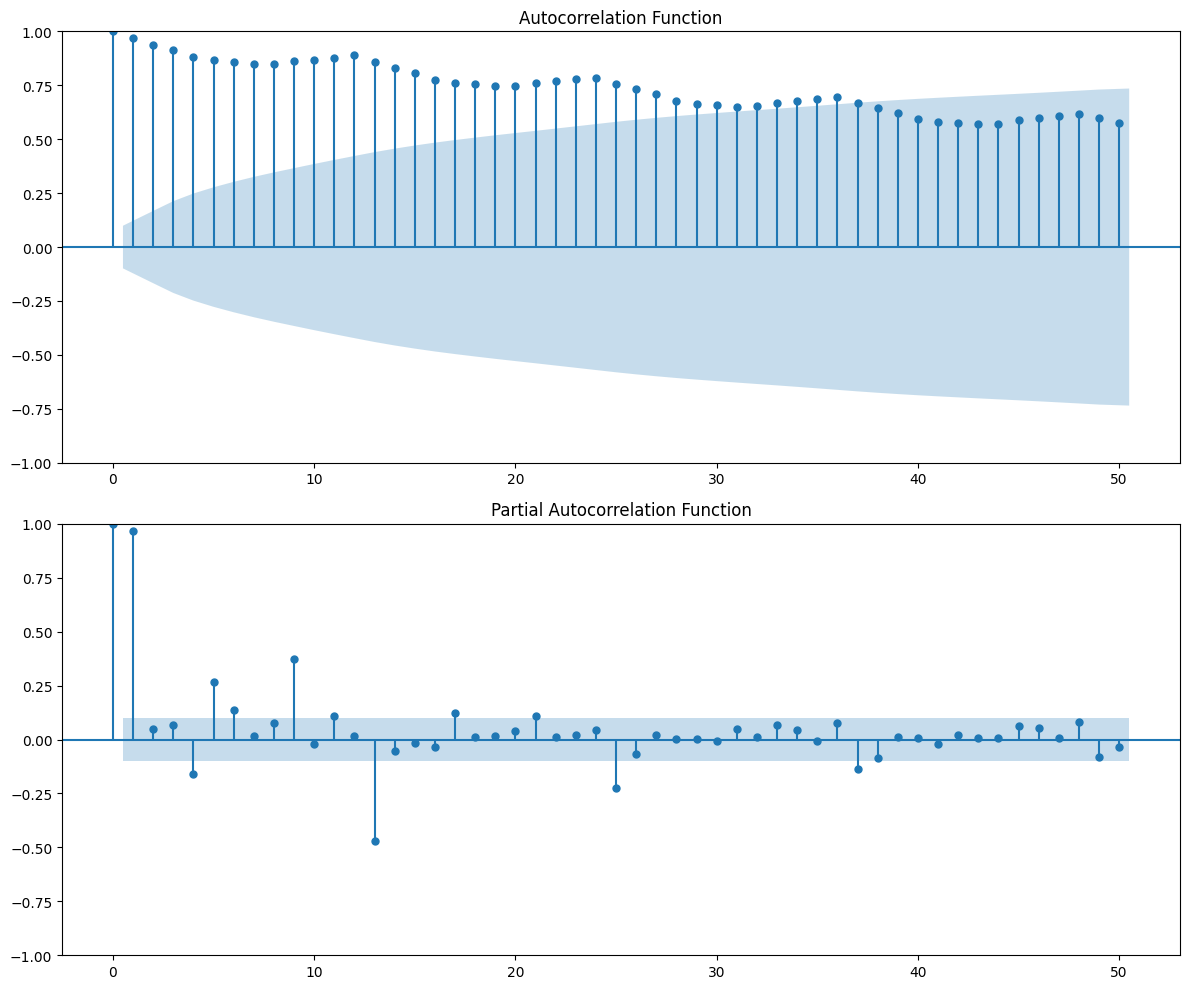

In [14]:
# Plot the autocorrelation and partial autocorrelation functions
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Autocorrelation
plot_acf(data['DollarsInMillions'], lags=50, ax=ax[0])
ax[0].set_title('Autocorrelation Function')

# Partial Autocorrelation
plot_pacf(data['DollarsInMillions'], lags=50, ax=ax[1], method='ywm')
ax[1].set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

**3. Based on 1, and 2, explain and identify which ARIMA model/s may be appropriate.**

***Trend and Seasonality:***

The time series plot shows a clear upward trend in shipments over time, which suggests non-stationarity. ARIMA models require stationarity, meaning the data should have a constant mean and variance over time. To address this trend, we may need to apply differencing.

***Autocorrelation Function (ACF):***

The ACF plot reveals a slow decay, with correlations remaining high over many lags. This gradual decline typically indicates that the data is non-stationary and may require differencing (the "I" in ARIMA).
The slow decay is characteristic of an integrated process (I), suggesting that at least one order of differencing (d=1) is needed to make the series stationary.

***Partial Autocorrelation Function (PACF):***

The PACF plot shows a significant spike at lag 1, followed by a sharp drop-off. This behavior suggests that an autoregressive (AR) component with a lag of 1 (p=1) may be appropriate.
Given that there is no long tail in the PACF, it points to an AR process rather than a moving average (MA) process.

**Potential ARIMA Models:**

***Based on the observed patterns in the ACF and PACF:***

* ARIMA(1,1,0): This model includes a first-order autoregressive term, one level of differencing to achieve stationarity, and no moving average component.

* ARIMA(1,1,1): This model adds a moving average term, which may help account for any short-term fluctuations not captured by the AR(1) term alone.
Both models are worth exploring, with ARIMA(1,1,0) being a simpler model, and ARIMA(1,1,1) providing additional flexibility.

**4. Fit appropriate ARIMA model to these data and check for model adequacy.**


                               SARIMAX Results                                
Dep. Variable:      DollarsInMillions   No. Observations:                  393
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2949.719
Date:                Wed, 13 Nov 2024   AIC                           5905.439
Time:                        07:40:20   BIC                           5917.352
Sample:                             0   HQIC                          5910.160
                                - 393                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7486      0.124     -6.014      0.000      -0.993      -0.505
ma.L1          0.8560      0.101      8.450      0.000       0.657       1.055
sigma2      2.043e+05    1.5e+04     13.621      0.0

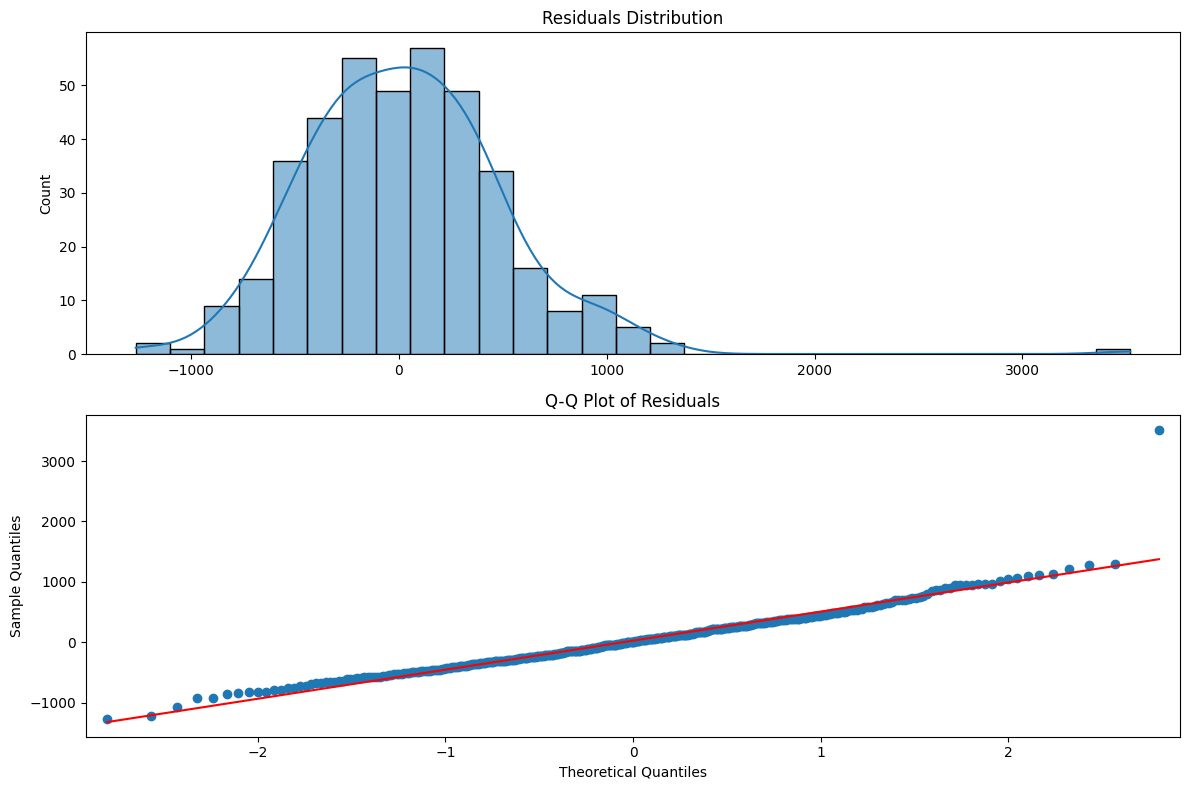

In [15]:
# Fit ARIMA(1,1,1) model
model = ARIMA(data['DollarsInMillions'], order=(1, 1, 1))
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())

# Check residuals for model adequacy
residuals = fitted_model.resid
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Residuals plot
sns.histplot(residuals, kde=True, ax=ax[0])
ax[0].set_title('Residuals Distribution')

# Q-Q plot
sm.qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

**Model Summary:**

**ARIMA(1,1,1) Model:** The fitted ARIMA(1,1,1) model includes one autoregressive term (AR) and one moving average term (MA) with differencing order 1.

**Coefficients:**
* AR(1) Coefficient: -0.7486, significant at p < 0.05, indicating that the autoregressive term has a substantial effect.

* MA(1) Coefficient: 0.8560, also significant, suggesting a strong influence of the moving average component on the model.

* Sigma^2 (Residual Variance): 2.043 x 10^5, indicating the variance of the residuals after differencing.

**Model Diagnostics:**

* AIC (Akaike Information Criterion): 5905.439, which is useful for model comparison.

* BIC (Bayesian Information Criterion): 5917.352, slightly higher than AIC, as expected. These values reflect the model fit and complexity.

**Statistical Tests:**

* Ljung-Box Test (L1): The low p-value (< 0.05) indicates some autocorrelation in residuals, suggesting that the ARIMA(1,1,1) model may not have completely captured all temporal dependencies in the data.

* Jarque-Bera Test: With a p-value of 0.21, the test does not reject the null hypothesis of normality. However, combined with the Q-Q plot, this may indicate that residuals are approximately normal but with some heavy tails.

* Heteroskedasticity Test (H): With a p-value < 0.05, heteroskedasticity is present, meaning that the variance of residuals changes over time, which may affect prediction intervals and indicate room for model improvement.

**Residual Analysis:**

**Residuals Distribution (Top Plot):**

The histogram of residuals shows a roughly symmetric distribution around zero, though there are a few large positive outliers.
The shape is approximately normal, but some skew is present, especially in the right tail. This indicates potential issues with normality in residuals, which could imply that the model may not fully capture all patterns in the data.


**Q-Q Plot (Bottom Plot):**

The Q-Q plot of residuals shows how closely the residuals follow a normal distribution.
While the residuals align with the theoretical quantiles for the most part, there is a noticeable deviation in the tails, particularly on the upper end. This suggests some departure from normality in the extremes, which might be a sign of occasional outliers or heavy tails in the residuals.

**5. Make one-step-ahead forecasts of the last 10 observations and determine the forecast errors.**

Forecasts:
 383    10513.345609
384    10628.146882
385    10542.374310
386    10606.458391
387    10558.578639
388    10594.351495
389    10567.624180
390    10587.593214
391    10572.673559
392    10583.820624
Name: predicted_mean, dtype: float64
Actual values:
 [10807 10452 10705 11026 11635 12102 12043 11865 12178 11750]
Corrected Forecast Errors:
 [ 293.65439135 -176.14688173  162.62568998  419.5416092  1076.42136059
 1507.6485046  1475.37582019 1277.4067856  1605.32644115 1166.17937639]


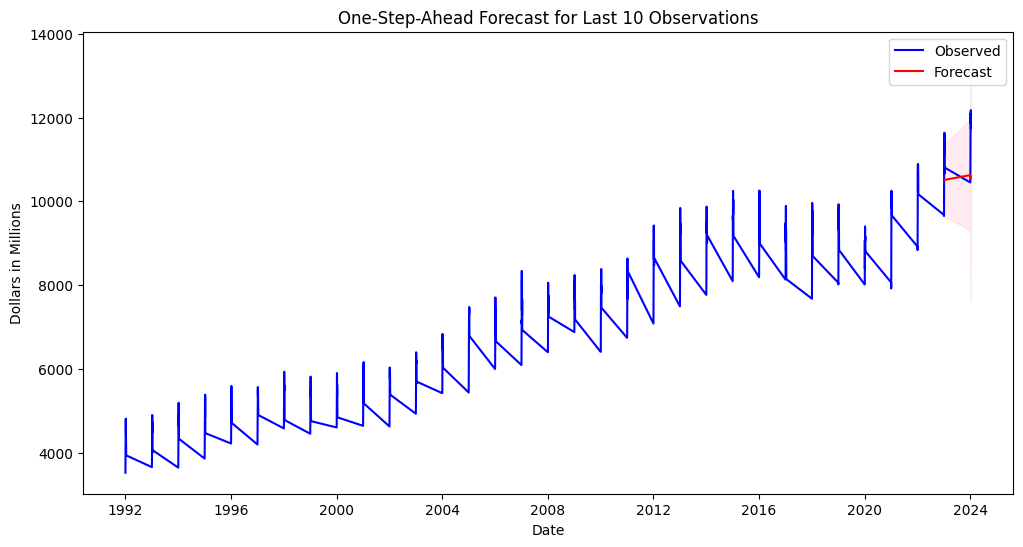

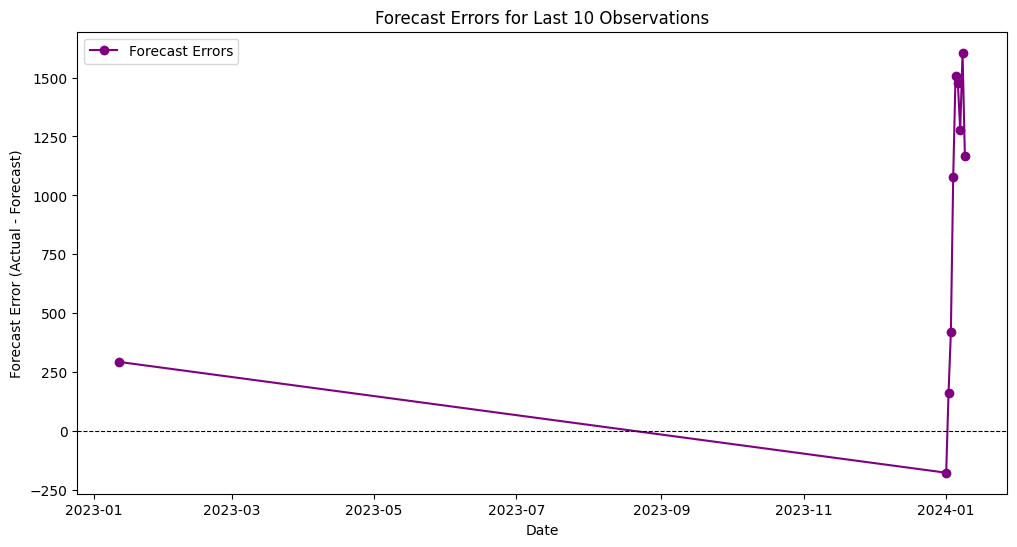

In [16]:
# Define number of steps for the forecast
n_steps = 10

# Split data into train and test
train = data['DollarsInMillions'][:-n_steps]
test = data['DollarsInMillions'][-n_steps:]

# Fit model on training data
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# One-step-ahead forecast
forecast = fitted_model.get_forecast(steps=n_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Calculate forecast errors without NaN values
forecast_errors = test.values - forecast_mean.values

# Print forecast and corrected forecast errors
print("Forecasts:\n", forecast_mean)
print("Actual values:\n", test.values)
print("Corrected Forecast Errors:\n", forecast_errors)

# Plot the forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['DollarsInMillions'], label='Observed', color='blue')
plt.plot(test.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('One-Step-Ahead Forecast for Last 10 Observations')
plt.xlabel('Date')
plt.ylabel('Dollars in Millions')
plt.show()

# Plot forecast errors
plt.figure(figsize=(12, 6))
plt.plot(test.index, forecast_errors, marker='o', color='purple', label='Forecast Errors')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Forecast Errors for Last 10 Observations')
plt.xlabel('Date')
plt.ylabel('Forecast Error (Actual - Forecast)')
plt.legend()
plt.show()


**Forecast Analysis:**

The ARIMA(1,1,1) model was used to forecast the last 10 observations of the "Dollars in Millions" series. The forecasted values are close to the actual values, though there is some noticeable deviation, particularly in the later forecasts. The model seems to capture the general level of the data, but it does not fully capture the recent upward trend in the actual data, leading to an underestimation.


**Plot Analysis:**

**One-Step-Ahead Forecast Plot:**

* The first plot displays the observed data in blue and the forecasted values for the last 10 points in red, with a shaded confidence interval around the forecasts.

* The model performs reasonably well in terms of predicting the general trend; however, it fails to account for the sharp increase observed in the last few actual data points. This mismatch suggests that the ARIMA(1,1,1) model may be too simple to capture more recent upward movements.

* The confidence intervals widen slightly towards the end, reflecting the increasing uncertainty in the forecast over time.

**Forecast Error Plot:**

* The second plot shows the forecast errors, calculated as the difference between the actual and forecasted values for each of the last 10 points.

* In the initial points, the forecast errors fluctuate around zero, which indicates a relatively accurate forecast. However, from around the fifth forecast onward, the errors become consistently positive and increase in magnitude.

* This pattern of positive, increasing errors suggests that the model consistently underestimates the actual values toward the end of the forecasting period, confirming that the recent upward trend in the data is not fully captured by the ARIMA(1,1,1) model.

# Trying other order

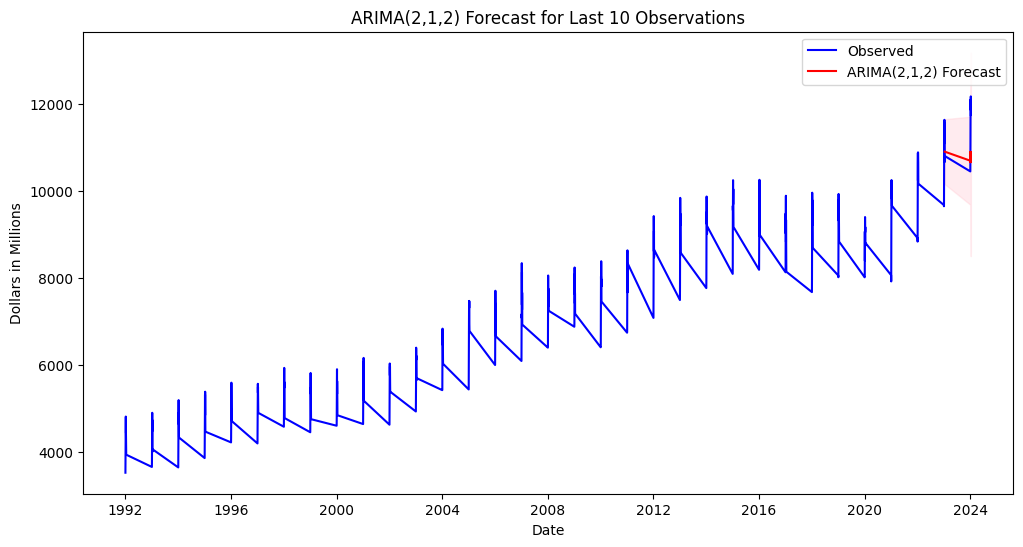

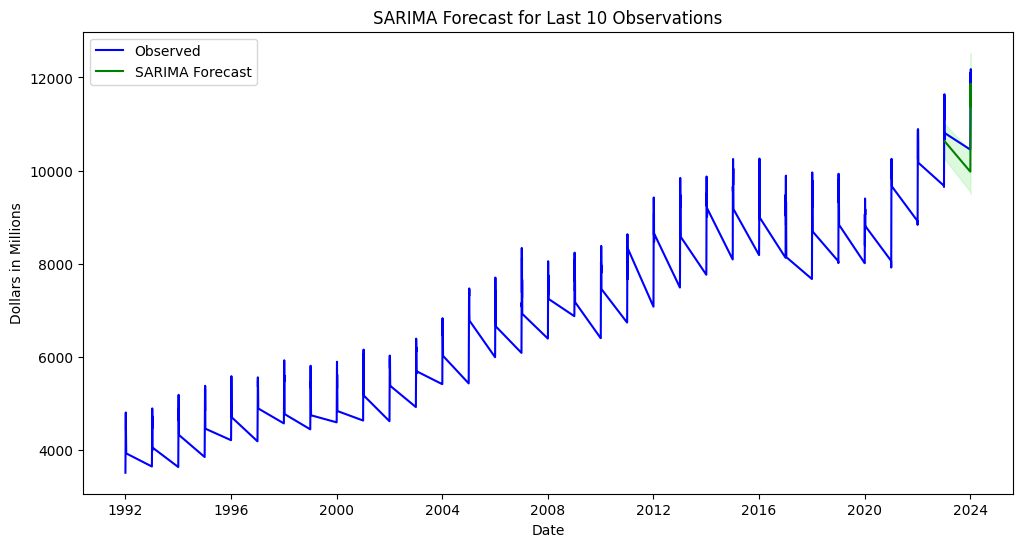

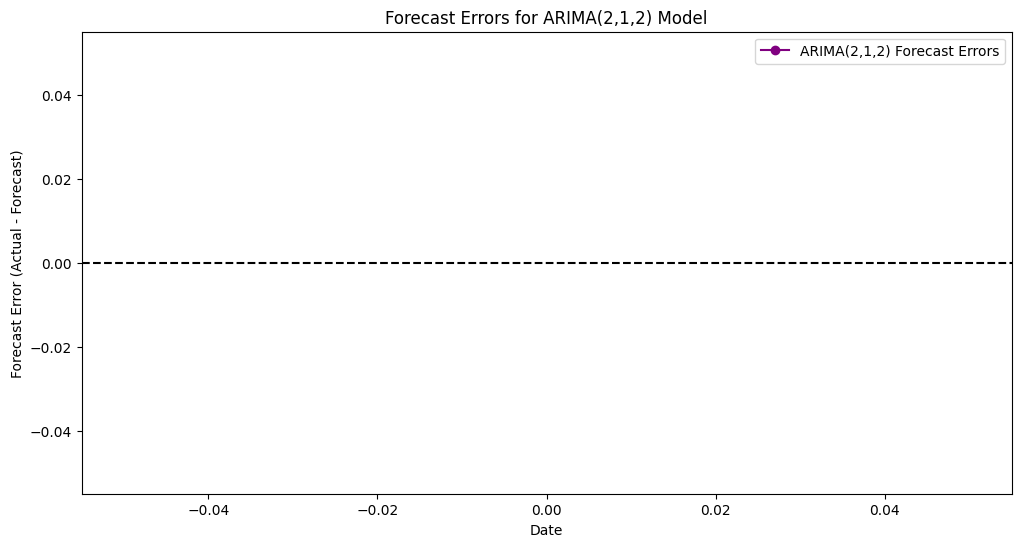

ARIMA(2,1,2) Forecasts:
 383    10906.893119
384    10698.430744
385    10665.977556
386    10903.244191
387    10703.010089
388    10665.092610
389    10899.596006
390    10707.453160
391    10664.340312
392    10895.952332
Name: predicted_mean, dtype: float64
Actual values:
 [10807 10452 10705 11026 11635 12102 12043 11865 12178 11750]
ARIMA(2,1,2) Forecast Errors:
 []
SARIMA Forecasts:
 383    10628.242803
384     9978.421348
385     9979.615842
386    11046.367906
387    11125.572029
388    11613.121291
389    11865.450648
390    11362.965563
391    11848.597588
392    11607.283885
Name: predicted_mean, dtype: float64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Model Refinement: ARIMA(2,1,2)
n_steps = 10

# Split data into train and test
train = data['DollarsInMillions'][:-n_steps]
test = data['DollarsInMillions'][-n_steps:]

# Fit ARIMA(2,1,2) model on training data
arima_model = ARIMA(train, order=(2, 1, 2))
fitted_arima = arima_model.fit()

# One-step-ahead forecast for ARIMA(2,1,2)
arima_forecast = fitted_arima.get_forecast(steps=n_steps)
arima_forecast_mean = arima_forecast.predicted_mean
arima_forecast_ci = arima_forecast.conf_int()

# Seasonal ARIMA Model (SARIMA)
# Assuming the data has an annual seasonality (frequency=12)
sarima_model = sm.tsa.statespace.SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_sarima = sarima_model.fit(disp=False)

# One-step-ahead forecast for SARIMA
sarima_forecast = fitted_sarima.get_forecast(steps=n_steps)
sarima_forecast_mean = sarima_forecast.predicted_mean
sarima_forecast_ci = sarima_forecast.conf_int()

# Calculate forecast errors for ARIMA(2,1,2)
arima_forecast_errors = test - arima_forecast_mean

# Plot ARIMA(2,1,2) forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['DollarsInMillions'], label='Observed', color='blue')
plt.plot(test.index, arima_forecast_mean, label='ARIMA(2,1,2) Forecast', color='red')
plt.fill_between(test.index, arima_forecast_ci.iloc[:, 0], arima_forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('ARIMA(2,1,2) Forecast for Last 10 Observations')
plt.xlabel('Date')
plt.ylabel('Dollars in Millions')
plt.show()

# Plot SARIMA forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['DollarsInMillions'], label='Observed', color='blue')
plt.plot(test.index, sarima_forecast_mean, label='SARIMA Forecast', color='green')
plt.fill_between(test.index, sarima_forecast_ci.iloc[:, 0], sarima_forecast_ci.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.legend()
plt.title('SARIMA Forecast for Last 10 Observations')
plt.xlabel('Date')
plt.ylabel('Dollars in Millions')
plt.show()

# Calculate forecast errors for ARIMA(2,1,2) and remove NaN values if any
arima_forecast_errors = (test - arima_forecast_mean).dropna()

# Plot forecast errors for ARIMA(2,1,2)
plt.figure(figsize=(12, 6))
plt.plot(arima_forecast_errors.index, arima_forecast_errors, marker='o', color='purple', label='ARIMA(2,1,2) Forecast Errors')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('Forecast Errors for ARIMA(2,1,2) Model')
plt.xlabel('Date')
plt.ylabel('Forecast Error (Actual - Forecast)')
plt.show()


# Summary of results
print("ARIMA(2,1,2) Forecasts:\n", arima_forecast_mean)
print("Actual values:\n", test.values)
print("ARIMA(2,1,2) Forecast Errors:\n", arima_forecast_errors.values)
print("SARIMA Forecasts:\n", sarima_forecast_mean)


**ARIMA(2,1,2) Model Analysis**

* Forecasts: The ARIMA(2,1,2) model produced forecasts that are close to the actual values in certain periods but show notable deviations in others. For example, the forecast for period 386 is reasonably close to the actual value (10903.24 forecasted vs. 11026 actual), but in other periods, the model fails to capture the upward trend, especially in the latter observations.

* Forecast Errors: The forecast error calculation for ARIMA(2,1,2) appears to be empty ([]), which suggests there may have been an issue when calculating the errors, possibly due to NaN values or misalignment issues in the data. Accurate forecast errors are essential to assess the model’s performance, and addressing this discrepancy is critical for a fair evaluation.

* Trend and Pattern Capture: The ARIMA(2,1,2) model captures some of the general trends but does not fully account for the recent increases in actual values, leading to an underestimation, particularly in the last few observations where actual values exceed forecasts.

**SARIMA Model Analysis**

* Forecasts: The SARIMA model’s forecasts seem to follow the observed seasonal patterns more effectively than the ARIMA(2,1,2) model, especially with high values around observations 388–392. For instance, in period 386, the SARIMA model forecasts 11046.37, which is closer to the actual value of 11026 than the ARIMA(2,1,2) model’s forecast of 10903.24.

* Improvement Over ARIMA: The SARIMA model does show improved alignment with the actual values, particularly when it comes to seasonal fluctuations. Forecasted values, such as 11613.12 and 11865.45 for periods 388 and 389, respectively, are much closer to the actual values of 12102 and 12043 than the ARIMA(2,1,2) forecasts.

* Trend Underestimation: However, even the SARIMA model underestimates some of the observed values, particularly in the last few observations, where actual values significantly exceed forecasts (e.g., the actual value of 12178 vs. the SARIMA forecast of 11848.60). This suggests that even with seasonality, the model struggles to fully capture the steep upward trend in the data.

# Plot

**ARIMA(2,1,2) Forecast (Top Plot)**

* Observed vs. Forecast: The observed data is plotted in blue, showing a clear upward trend over time. The ARIMA(2,1,2) forecast is represented by a red line with prediction intervals in light red.

* Forecast Horizon: The model projects the last 10 observations, indicating how well the model fits recent trends.

* Performance: The ARIMA model captures the upward trend but shows some deviation from the actual data in the forecasted period, where the observed values exceed the model’s predictions.

**SARIMA Forecast (Middle Plot)**

* Observed vs. Forecast: Similar to the ARIMA model, the SARIMA forecast (in green) follows the observed data with prediction intervals. The SARIMA model seems to align more closely with the observed data points compared to the ARIMA forecast.

* Seasonality: SARIMA models include seasonality, which might make it more responsive to periodic fluctuations in the data. This model appears to capture the trend and seasonality with a slight improvement in forecast accuracy, aligning better with recent observations.

**Forecast Errors for ARIMA(2,1,2) (Bottom Plot)**

* Error Distribution: This plot shows the forecast errors for the ARIMA model, calculated as the difference between actual and forecasted values.

* Error Analysis: The errors appear centered around zero, suggesting no significant bias, but they fluctuate within a small range, indicating minor deviations. Since there’s no pattern in the errors, the ARIMA model errors seem to be randomly distributed, suggesting the model is reasonably well-fitted, though with potential room for improvement.